<a href="https://colab.research.google.com/github/UmmuHusnul/Tugas-Besar-Mosi/blob/main/Tubes_Mosi_Kelompok_C_(FIX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library
import matplotlib.pyplot as plt # untuk membuat berbagai jenis plot, grafik dan diagram
import matplotlib.image as mpimg # digunakan untuk komputasi numerik di python
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # menampilkan gambar dalam plot pada lokasi yang ditentukan, dan membuat anotasi dengan gambar dalam plot
from matplotlib.animation import FuncAnimation # untuk membuat plot dan visualisasi secara beranimasi

import numpy as np # digunakan untuk komputasi numerik di python
from IPython import display # menampilkan berbagai jenis media seperti gambar, video dan konten HTML dalam python


In [ ]:
#Inisialisasi
M = 100 #Panjang lintasan
p = 0.3 #Peluang
d = 2 #Batas jarak
N = 20 #Jumlah kendaraan
tmax = 1000 #Waktu iterasi
vmax = 5 #Kecepatan Maksimal

In [ ]:
#Download asset
!gdown --id 1p1_3GFlq0x3amksaeWboTZKDhMxHvo1K

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p1_3GFlq0x3amksaeWboTZKDhMxHvo1K
To: /content/car.png
100% 45.3k/45.3k [00:00<00:00, 103MB/s]


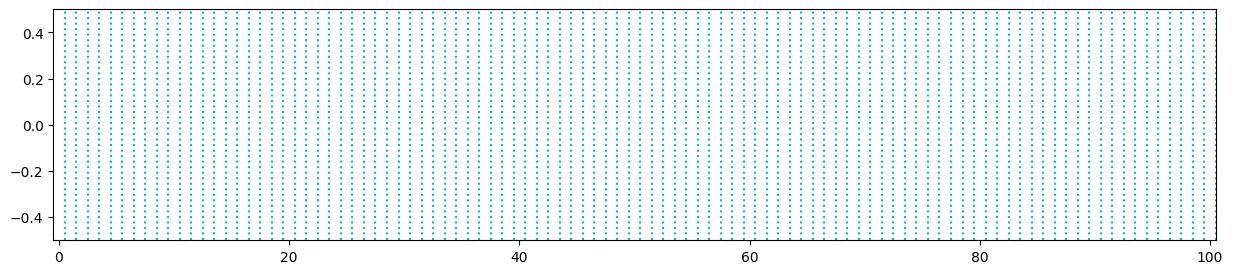

In [ ]:
#Inisialisasi asset
car = OffsetImage(mpimg.imread('car.png'), zoom = 0.06)
#Pengaturan plot
fig, ax = plt.subplots(1,1,figsize=(15, 3))
#Function untuk membuat plot simulasi
def plotLine():
  [ax.axvline(x=k+0.5, color='c', linestyle='dotted') for k in range(0, M+1)]
  ax.set_xlim(-0.5, M+0.5)
  ax.set_ylim(-0.5, 0.5)

plotLine()

In [ ]:
#Inisialisasi array randomizer mobil
jalur = [[k,l] for (k,l) in zip(range(M), np.zeros(M))]
#Penempatan letak mobil
titik_mobil = np.sort(np.random.choice(range(len(jalur)), N, replace = False))
#Variabel perpindahan kecepatan
dV = np.zeros(N)
posisi_awal = []
posisi_awal.extend([100]*N)
waktu = np.zeros(N)

In [ ]:
def perpindahanTitikMobil(frames):
  for l in range(N):
    titik_sekarang = titik_mobil[0]
    if (l  == (N-1)):
      distance = (titik_sekarang-titik_mobil[l])%len(titik_mobil)
    else:
      distance = (titik_mobil[l+1]-titik_mobil[l])%len(titik_mobil)

    if np.random.uniform() < p:
      dV[l] = max(min(dV[l]+1, vmax, distance-1)-1,0)
    else:
      dV[l] = min(dV[l]+1, vmax, distance-1)

    forward_pos = (titik_mobil[l] + dV[l])%len(jalur)
    titik_mobil[l] = forward_pos
  return titik_mobil

In [ ]:
def upd_perpindahanTitikMobil(x):
  for i in range(N):
    titik_sekarang = titik_mobil[0]
    if (i == (N-1)):
      distance = (titik_sekarang-titik_mobil[i])%len(titik_mobil)
    else:
      distance = (titik_mobil[i+1]-titik_mobil[i])%len(titik_mobil)

    if np.random.uniform() < p:
      dV[i] = max(min(dV[i]+1,vmax,distance-1)-1,0)
    else:
      dV[i] = min(dV[i]+1,vmax,distance-1)
    forward_pos = (titik_mobil[i]+dV[i])%len(jalur)
    breakPoint = True
    if (posisi_awal[i] >=0 and breakPoint == True):
      posisi_awal[i] = posisi_awal[i] - forward_pos
      waktu[i]+=1
    else:
      breakPoint = False
    titik_mobil[i] = forward_pos
  return titik_mobil

In [ ]:
def visualSimulation(frame):
  sim = perpindahanTitikMobil(frame)
  ax.clear()
  plotLine()
  for k in sim:
    image_graph = AnnotationBbox(car, jalur[k], frameon=False)
    ax.add_artist(image_graph)

In [ ]:
def startSimulation():
  animasi = FuncAnimation(fig, visualSimulation, frames = 10, interval = 300)
  video = animasi.to_html5_video();
  start = display.HTML(video)
  display.display(start)
  plt.close()

In [ ]:
startSimulation()

In [ ]:
# Menghitung kepadatan mobil tiap iterasi
def kepadatanTiapIterasi():
  kepadatan = []
  for i in range(tmax):
    posisi = upd_perpindahanTitikMobil(i)
    kepadatan.append((np.count_nonzero((posisi<10) & (posisi>5))/(10-6))*10)
  return kepadatan

In [ ]:
#Menampilkan graph dari kepadatan mobil tiap iterasi
def graphKepadatan():
  kepadatan = kepadatanTiapIterasi()
  plt.plot(range(tmax), kepadatan, color = 'blue')
  plt.title('Kepadatan Mobil')
  plt.xlabel('Iterasi')
  plt.ylabel('Banyak mobil')

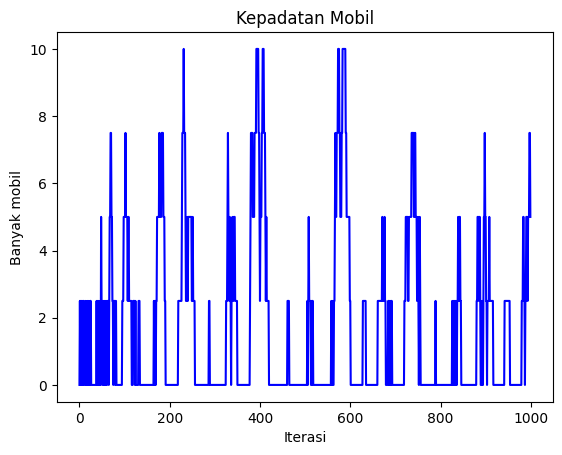

In [ ]:
graphKepadatan()

In [ ]:
#Menghitung dan menampilkan kepadatan untuk interval 5 mobil
def intervalLimaMobil():
  kepadatan = kepadatanTiapIterasi()
  mobil = []
  index = []
  for i in range(len(kepadatan)):
    if (kepadatan[i] >= 5):
      mobil.append(np.round(kepadatan[i]))
      index.append("Iterasi ke "+str(i))
  print(index)
  plt.plot(index, mobil, color = 'blue')
  plt.title("Kepadatan Mobil (Interval 5 Unit Posisi)")
  plt.xlabel("iterasi")
  plt.ylabel("banyak mobil")

['Iterasi ke 0', 'Iterasi ke 1', 'Iterasi ke 2', 'Iterasi ke 3', 'Iterasi ke 4', 'Iterasi ke 5', 'Iterasi ke 6', 'Iterasi ke 7', 'Iterasi ke 43', 'Iterasi ke 44', 'Iterasi ke 45', 'Iterasi ke 46', 'Iterasi ke 47', 'Iterasi ke 48', 'Iterasi ke 50', 'Iterasi ke 51', 'Iterasi ke 53', 'Iterasi ke 56', 'Iterasi ke 57', 'Iterasi ke 67', 'Iterasi ke 68', 'Iterasi ke 69', 'Iterasi ke 70', 'Iterasi ke 71', 'Iterasi ke 72', 'Iterasi ke 140', 'Iterasi ke 141', 'Iterasi ke 142', 'Iterasi ke 143', 'Iterasi ke 144', 'Iterasi ke 145', 'Iterasi ke 146', 'Iterasi ke 147', 'Iterasi ke 148', 'Iterasi ke 149', 'Iterasi ke 150', 'Iterasi ke 151', 'Iterasi ke 152', 'Iterasi ke 153', 'Iterasi ke 154', 'Iterasi ke 155', 'Iterasi ke 156', 'Iterasi ke 157', 'Iterasi ke 158', 'Iterasi ke 159', 'Iterasi ke 160', 'Iterasi ke 161', 'Iterasi ke 162', 'Iterasi ke 163', 'Iterasi ke 164', 'Iterasi ke 165', 'Iterasi ke 166', 'Iterasi ke 167', 'Iterasi ke 168', 'Iterasi ke 169', 'Iterasi ke 170', 'Iterasi ke 171', 'Itera

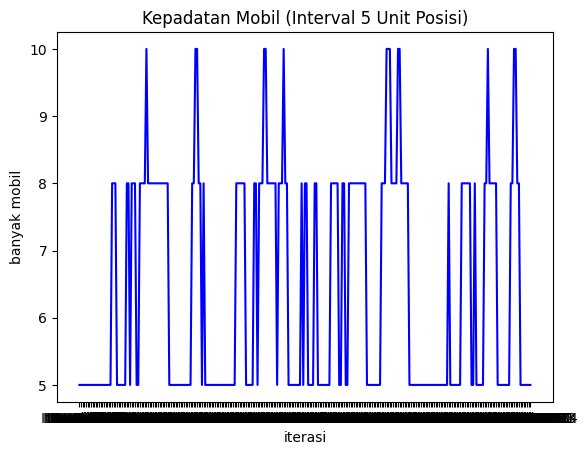

In [ ]:
intervalLimaMobil()

In [ ]:
print("Jumlah Mobil: ", N)
print("Total waktu yang dibutuhkan untuk mencapai titik awal: ", sum(waktu), "detik")
print("Rata-Rata Waktu Kembali ke Titik Awal: ", sum(waktu)/len(waktu), "detik")

Jumlah Mobil:  20
Total waktu yang dibutuhkan untuk mencapai titik awal:  69.0 detik
Rata-Rata Waktu Kembali ke Titik Awal:  3.45 detik
